In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Charger le fichier CSV
df = pd.read_csv('../data/processed.csv')

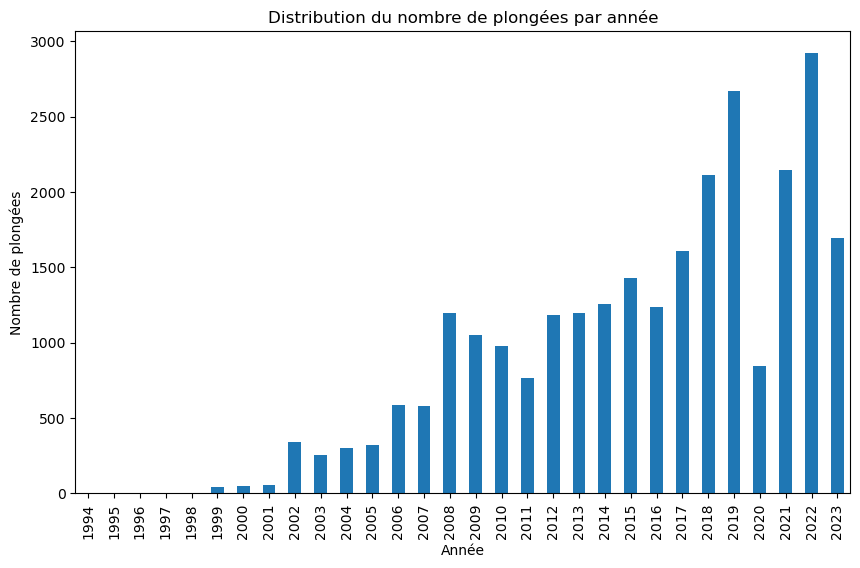

In [23]:
# Convertir la colonne 'Day' en datetime
df['Year'] = pd.to_datetime(df['Day']).dt.year

# Calculer le nombre de plongées par année
dives_per_year = df['Year'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(10, 6))
dives_per_year.plot(kind='bar')
plt.title('Distribution du nombre de plongées par année')
plt.xlabel('Année') 
plt.ylabel('Nombre de plongées')
plt.show()

In [1]:
#on ne considère que les années après 2000 car les données ne sont pas collectées avant.
#le trou de 2020 est le covid

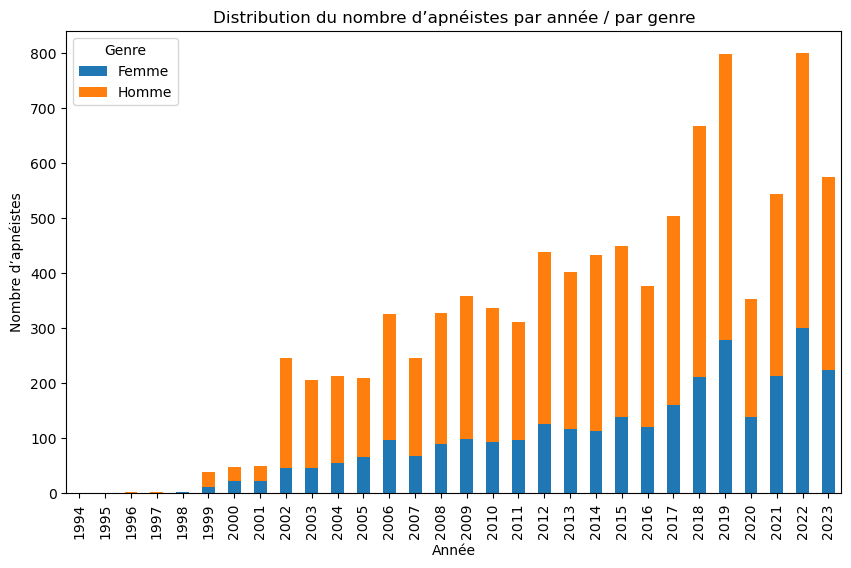

In [19]:
# Calculer le nombre d'apnéistes par année et par genre
apneists_per_year_gender = df.groupby(['Year', 'Gender'])['Diver'].nunique().unstack()

# Créer le graphique
apneists_per_year_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution du nombre d’apnéistes par année / par genre')
plt.xlabel('Année')
plt.ylabel('Nombre d’apnéistes')
plt.legend(title='Genre', labels=['Femme', 'Homme'])
plt.show()


In [ ]:
# on voit qu'il y a plus d'hommes que de femmes dans la discipline, surtout au début.

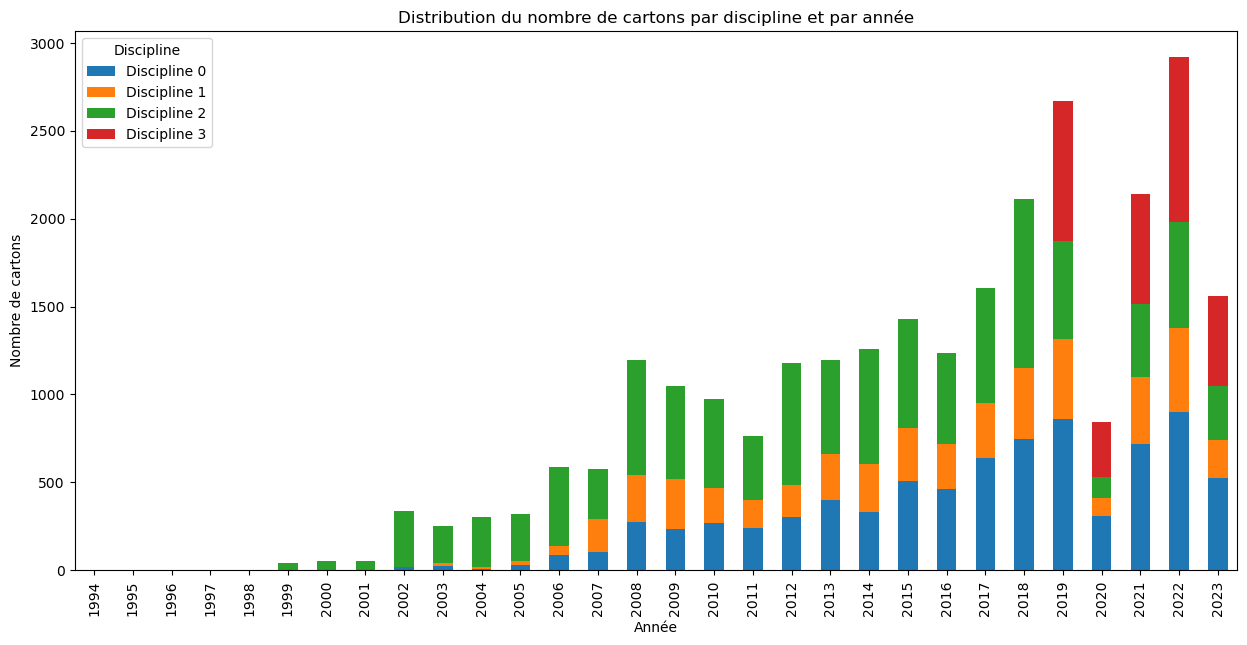

In [20]:
# Pivoter les données pour obtenir le nombre de cartons par année et par discipline
cards_per_discipline_year = df.pivot_table(index='Year', columns='Discipline', values='Card', aggfunc='count', fill_value=0)

# Créer le graphique à barres empilées
cards_per_discipline_year.plot(kind='bar', stacked=True, figsize=(15, 7))

# Ajouter les légendes et les titres
plt.title('Distribution du nombre de cartons par discipline et par année')
plt.xlabel('Année')
plt.ylabel('Nombre de cartons')
plt.legend(title='Discipline', labels=['Discipline 0', 'Discipline 1', 'Discipline 2', 'Discipline 3'])

# Afficher le graphique
plt.show()

In [ ]:
#la discipline 3 est arrivé seulement depuis 4 ans, c'est donc une discipline avec moins de données. surtout qu'il y a eu le covid.

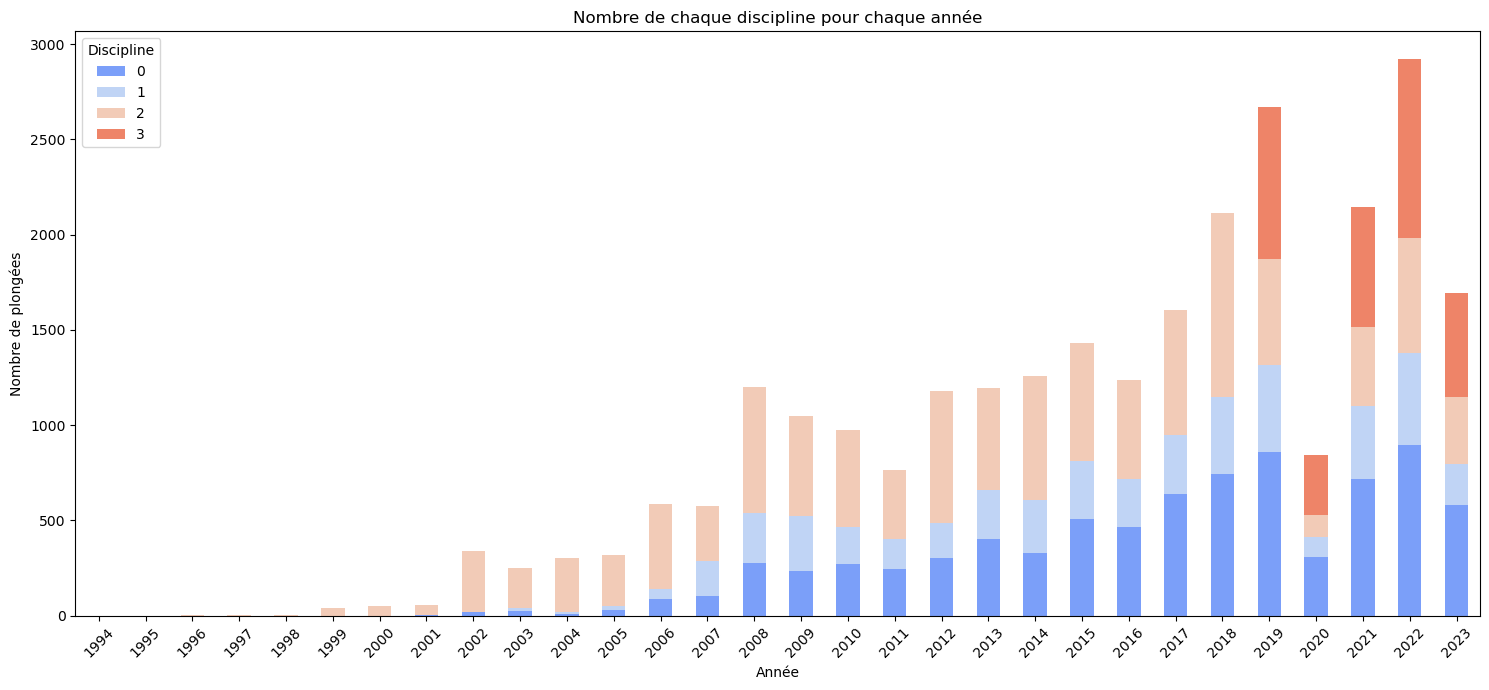

In [21]:
# Compter le nombre d'occurrences de chaque discipline par année
discipline_counts_per_year = df.groupby(['Year', 'Discipline']).size().unstack(fill_value=0)

# Définir une palette de couleurs Seaborn plus agréable à l'œil
palette = sns.color_palette("coolwarm", n_colors=discipline_counts_per_year.shape[1])

# Créer un graphique à barres pour chaque discipline en utilisant la palette de couleurs
discipline_counts_per_year.plot(kind='bar', stacked=True, figsize=(15, 7), color=palette)

# Ajouter des titres et des étiquettes
plt.title('Nombre de chaque discipline pour chaque année')
plt.xlabel('Année')
plt.ylabel('Nombre de plongées')
plt.legend(title='Discipline', loc='upper left')

# Ajuster l'affichage pour les étiquettes de l'axe des x si nécessaire
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()  
plt.show()


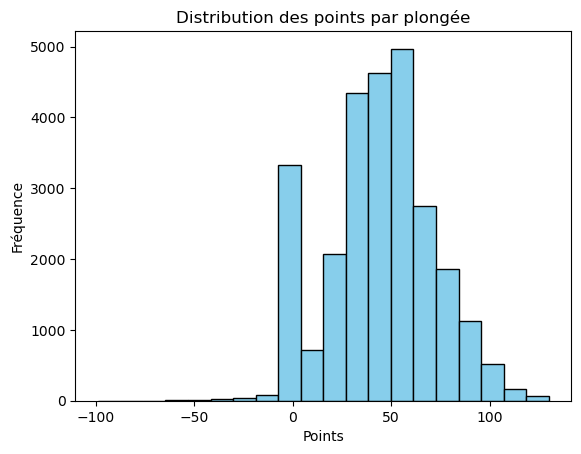

In [14]:
# Supprimer les valeurs NaN qui ne peuvent pas être tracées dans un histogramme
df = df.dropna(subset=['Points'])

# Maintenant, trace l'histogramme
df['Points'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des points par plongée')
plt.xlabel('Points')
plt.ylabel('Fréquence')
plt.show()

In [ ]:
#la majorité des plongées fait soit 0 soit environ 50 points. car soit elles sont réussies soit elles sont carton rouge et donc 0

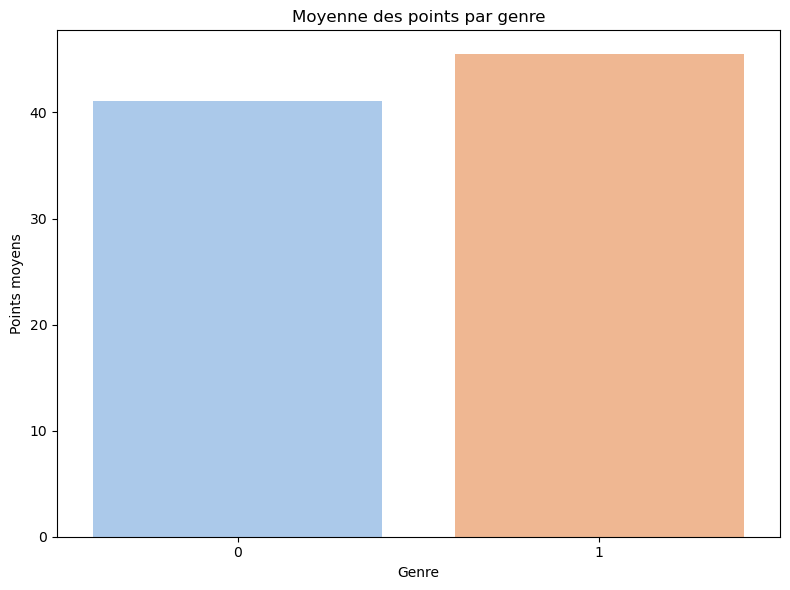

In [13]:
# Calcul de la moyenne des points par genre
average_points_by_gender = df.groupby('Gender')['Points'].mean().reset_index()

# Créer un graphique en barres
plt.figure(figsize=(8, 6))  
sns.barplot(x='Gender', y='Points', data=average_points_by_gender, palette='pastel')

# Ajouter des étiquettes pour une meilleure lisibilité
plt.title('Moyenne des points par genre')
plt.xlabel('Genre')
plt.ylabel('Points moyens')

# Afficher le graphique
plt.tight_layout()  
plt.show()

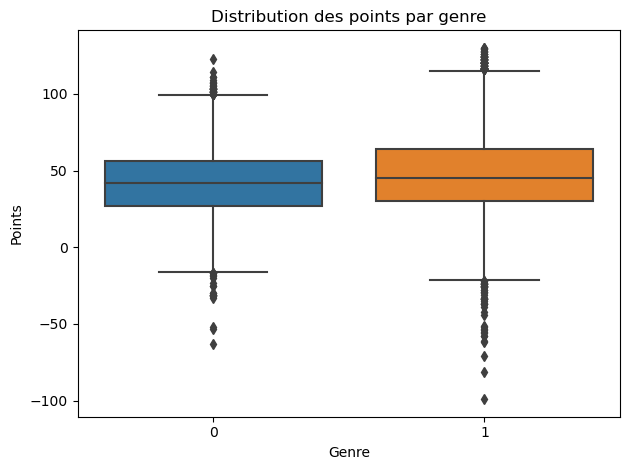

In [11]:
# Convertir 'Gender' en une variable catégorielle
df['Gender'] = df['Gender'].astype('category')

# Créer le boxplot en utilisant Seaborn
sns.boxplot(x='Gender', y='Points', data=df)

# Personnalisation du titre et des étiquettes
plt.title('Distribution des points par genre')
plt.xlabel('Genre')
plt.ylabel('Points')

# Afficher le graphique
plt.tight_layout()  # Ajuster la disposition
plt.show()

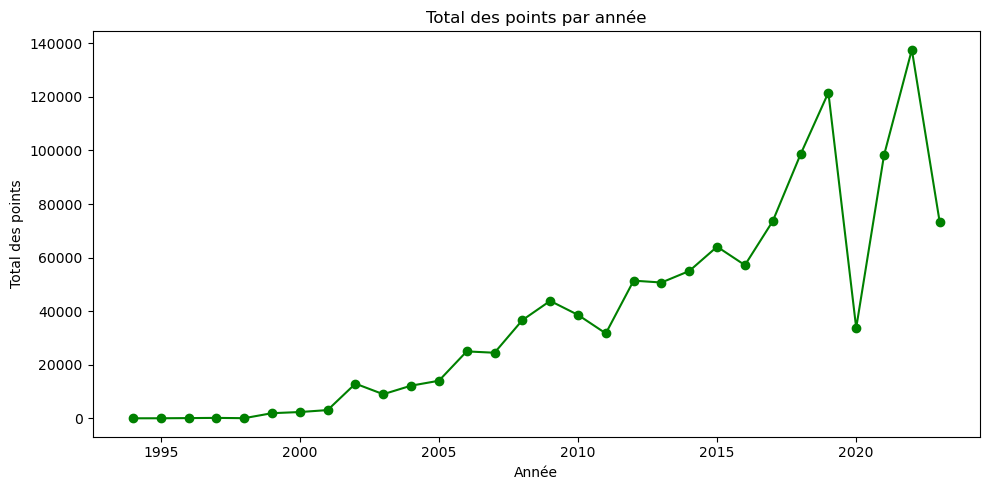

In [10]:
# Grouper par année et calculer la somme des points
yearly_points = df.groupby('Year')['Points'].sum()

# S'assurer que l'index est de type entier pour le tracé
yearly_points.index = yearly_points.index.map(int)

# Tracer la série temporelle
plt.figure(figsize=(10, 5))  
yearly_points.plot(kind='line', marker='o', color='green')
plt.title('Total des points par année')
plt.xlabel('Année')
plt.ylabel('Total des points')

# S'assurer que tout est bien affiché
plt.tight_layout()

# Afficher le graphique
plt.show()

In [ ]:
#plus le temps passe, plus il y a de points au total, mais c'est aussi du au fait qu'il y a plus de plongées

In [ ]:
#début du covid en 2019/20

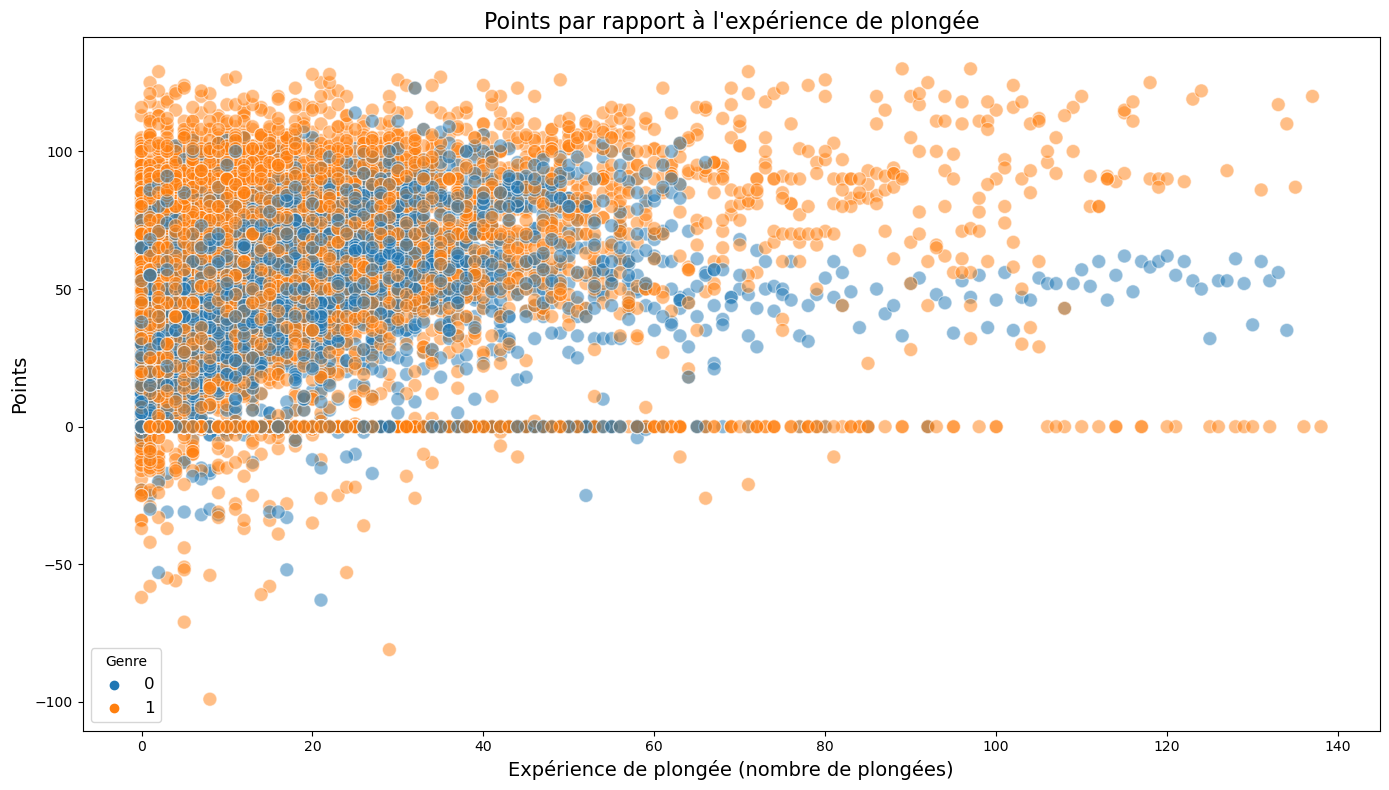

In [9]:
# Définis la taille de la figure pour le graphique
plt.figure(figsize=(14, 8))  

# Trace un graphique de dispersion 
sns.scatterplot(x='Experience Dive', y='Points', data=df, hue='Gender', alpha=0.5, s=100)  

# Titre et étiquettes 
plt.title('Points par rapport à l\'expérience de plongée', fontsize=16)
plt.xlabel('Expérience de plongée (nombre de plongées)', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.legend(title='Genre', fontsize=12)

# Ajuste le layout 
plt.tight_layout()

# Affiche le graphique
plt.show()

In [ ]:
#on peut voir que l'expérience jour légèrement dans la répartition des points, mais le fait d'être expérimenté n'implique pas forcément que le 0 est évité
#probablement car les gens plus expérimentés tentent aussi des profondeurs plus élevées

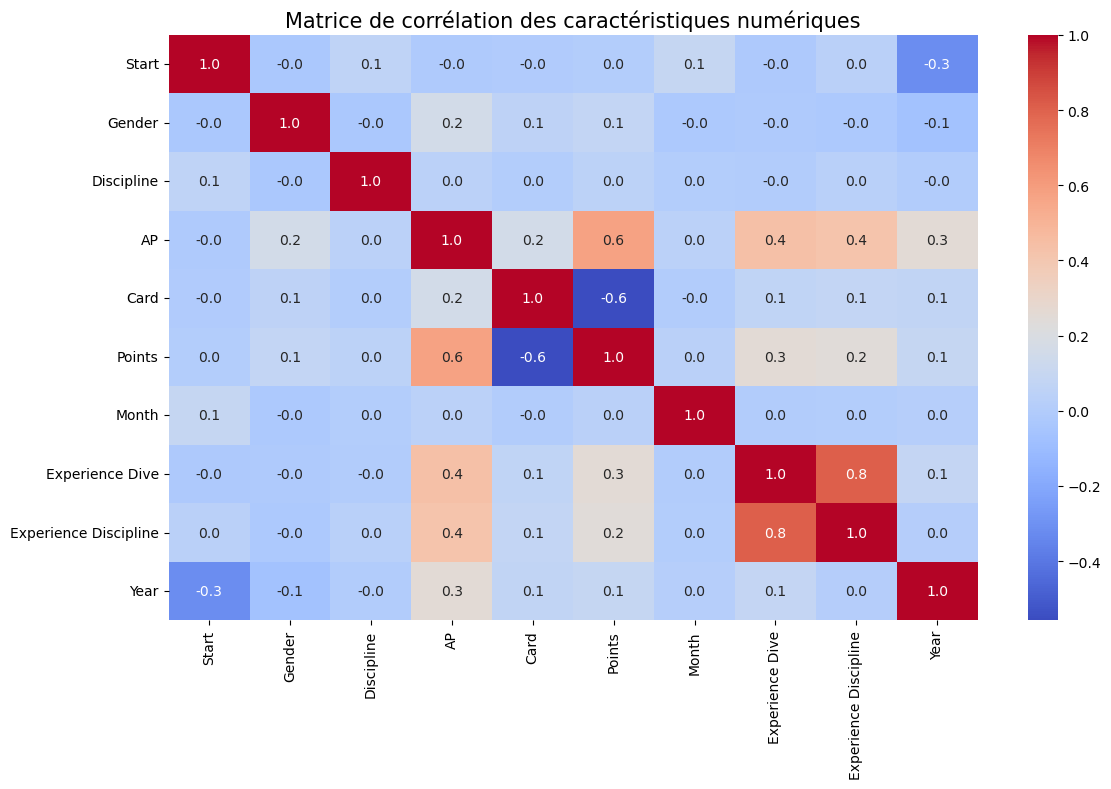

In [8]:
# Sélectionne seulement les colonnes numériques pour la corrélation
numeric_df = df.select_dtypes(include=[np.number])

# Calcule la matrice de corrélation sur des données numériques propres
correlation_matrix = numeric_df.corr()

# Taille de la figure
plt.figure(figsize=(12, 8))

# Crée une heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={'size':10})

# Titre de la heatmap
plt.title('Matrice de corrélation des caractéristiques numériques', size=15)

# Montre la figure avec un layout serré pour éviter le chevauchement et les coupures
plt.tight_layout()

# Affiche la figure
plt.show()

In [ ]:
#on remarque qu'il n'y a pas de grosse corrélation, et aussi ça confirme que l'expérience n'a pas tant d'impact que ça sur le résultat de la plongée
#à part évidement sur la profondeur c'est pour ça qu'on a 0.4 de corr entre exp et AP